# NLP Basics: What is Natural Language Processing & the Natural Language Toolkit?

### How to install NLTK on your local machine

Both sets of instructions below assume you already have Python installed. These instructions are taken directly from [http://www.nltk.org/install.html](http://www.nltk.org/install.html).

**Mac/Unix**

From the terminal:
1. Install NLTK: run `pip install -U nltk`
2. Test installation: run `python` then type `import nltk`

**Windows**

1. Install NLTK: [http://pypi.python.org/pypi/nltk](http://pypi.python.org/pypi/nltk)
2. Test installation: `Start>Python35`, then type `import nltk`

### Download NLTK data

In [1]:
import nltk
#nltk.download()

In [4]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

### What can you do with NLTK?

In [2]:
from nltk.corpus import stopwords

In [6]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## <font color=blue> 1. Reading and cleaning text data </font>

### <font color=red> 1.1 Read in semi-structured text data </font>

In [8]:
# Read in the raw text
rawData = open('SMSSpamCollection.tsv').read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [36]:
parsedData = rawData.replace('\t', '\n').split('\n') # Replace all tabs with newlines and then split the string and return a list
parsedData[0:5]
len(parsedData)

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 'ham',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam',
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

In [47]:
parsedData[-5:] #The last 5

['ham',
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
 'ham',
 'Rofl. Its true to its name',
 '']

### <font color=red> 1.2 Separate labels and text into two separate lists </font>

In [38]:
labelList = parsedData[0::2] #Extract every other string, i.e. labels
labelList[0:7]
len(labelList)

5571

In [15]:
textList = parsedData[1::2]
textList[0:5]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [16]:
import pandas as pd

Create a dataframe with a dictionary inside, where the keys are the name of the columns, and values are the lists where we've stored actual values

In [28]:
len(labelList)

5571

In [49]:
fullCorpus = pd.DataFrame({
    'label':labelList[:-1],
    'body_list':textList
}) # Because there is am empty quote after the last string which gets read as an unnecessary extra label in labelList

In [50]:
fullCorpus.head()

,body_list,label
0,I've been searching for the right words to tha...,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,"Nah I don't think he goes to usf, he lives aro...",ham
3,Even my brother is not like to speak with me. ...,ham
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham


Easier way to read in the tab-delimited raw file

In [51]:
dataset = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [52]:
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### <font color=red> 1.3 Redoing with pandas </font>

In [3]:
import pandas as pd

In [4]:
fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep = '\t', header=None)
fullCorpus.columns = ['label', 'body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Explore the dataset

Shape of the data set

In [59]:
print("Input data has {} rows and {} columns".format(len(fullCorpus),len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


How many Ham and Spam?

In [77]:
print("Out of {} rows, {} are ham and {} are spam".format(len(fullCorpus),
     len(fullCorpus[fullCorpus['label']=='ham']),
     len(fullCorpus[fullCorpus['label']=='spam'])),'\n',
     "Ham and Spam are respectively {:.2f}% and {:.2f}% of the data".format(
         len(fullCorpus[fullCorpus['label']=='ham'])*100/len(fullCorpus),
         len(fullCorpus[fullCorpus['label']=='spam'])*100/len(fullCorpus)
     ))

Out of 5568 rows, 4822 are ham and 746 are spam 
 Ham and Spam are respectively 86.60% and 13.40% of the data


How much missing data?

In [81]:
print("The number of nulls in the labels are {}".format(fullCorpus['label'].isnull().sum()))
print("The number of nulls in the text are {}".format(fullCorpus['body_text'].isnull().sum()))

The number of nulls in the labels are 0
The number of nulls in the text are 0


### <font color=red> 1.4 Regex </font>

Python's `re` package is the most commonly used regex resource. More details can be found [here](https://docs.python.org/3/library/re.html).

In [5]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

### <font color=red> 1.4.1 Splitting a sentence into a list of words </font>

In [83]:
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [84]:
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [86]:
# Repeat the search
re.split('\s+', re_test_messy) #Looks for one or more occurence of space and splits there

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [87]:
re.split('\s+', re_test_messy1) #But splitting on 1/more spaces won't work for other 

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [88]:
re.split('\W+', re_test_messy1) #Splitting on non-alphanumeric characters

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

findall() is same syntax as split() but searches for words instead of those special characters

In [90]:
re.findall('\S+', re_test) #Looks for one or more non-whitespace characters

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [91]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [93]:
re.findall('\S+', re_test_messy1) # The spl characters still count as non-whitespace characters, so cant handle them

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [95]:
re.findall('\w+', re_test) #Looks for one or more word characters

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

### <font color=red> 1.4.2 Replace a specific string </font>

In [96]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

Here we want to replace 'PEP8', 'PEP7', 'PEEP8' with 'PEP8 Python Style Guide'

In [98]:
re.findall('[a-z]+', pep8_test) #This misses out the capital words

['try', 'to', 'follow', 'guidelines']

In [100]:
re.findall('[A-Z]+', pep8_test) #This finds only the capitalized words

['I', 'PEP']

In [101]:
re.findall('[A-Z]+[0-9]', pep8_test)

['PEP8']

In [102]:
re.findall('[A-Z]+[0-9]', pep7_test)

['PEP7']

In [103]:
re.findall('[A-Z]+[0-9]', peep8_test)

['PEEP8']

Now replace these tokens with the correct word

In [104]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Style Guide', pep8_test)

'I try to follow PEP8 Python Style Guide guidelines'

In [105]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Style Guide', pep7_test)

'I try to follow PEP8 Python Style Guide guidelines'

In [106]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Style Guide', peep8_test)

'I try to follow PEP8 Python Style Guide guidelines'

### Other examples of regex methods 

- re.search()
- re.match()
- re.fullmatch()
- re.finditer()
- re.escape()

## <font color = blue> 2. Machine learning pipeline </font>

1. Raw text - Model can't distinguish words
2. Tokenize - Tell the model what to look at 
3. Clean text - Remove stop words/ punctuatios, stemming etc
4. Vectorize - Convert to numeric form
5. Machine learning algorithm - Fit/train model
6. Spam filter - System to filter emails

### <font color=red> 2.1 Pre-processing text data </font>

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. Remove punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/Stem

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth',100)

In [7]:
data = pd.read_csv('SMSSpamCollection.tsv', sep = '\t', header=None)
data.columns = ['label','body_text']

In [17]:
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
#What does the cleaned version look like
data_cleaned = pd.read_csv('SMSSpamCollection_cleaned.tsv', sep = '\t')
data_cleaned.head()

,label,body_text,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"['date', 'sunday']"


### <font color=red> 2.1.1 Remove punctuation </font>

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punct(text):
    text_nonpunct = [char for char in text if char not in string.punctuation]
    return(text_nonpunct)

In [21]:
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

In [22]:
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, i, n, g, , f, o, r, , t, h, e, , r, i, g, h, t,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, , a, , w, k, l, y, , c, o, m, p, , t, o, , w,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[N, a, h, , I, , d, o, n, t, , t, h, i, n, k, , h, e, , g, o, e, s, , t, o, , u, s, f, ,..."
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, , i, s, , n, o, t, , l, i, k, e, , t, o, , s,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, N, , S, U, N, D, A, Y, , W, I, T, H, , W, I, L, L]"


In [23]:
def remove_punct(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return(text_nonpunct)

In [25]:
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

In [26]:
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### <font color=red> 2.1.2 Tokenization </font>

In [27]:
import re

In [28]:
def tokenize(text):
    tokens = re.split('\W+', text) #Splitting on non alphanumeric characters
    return tokens

In [29]:
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [30]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### <font color=red> 2.1.3 Remove stopwords </font>

In [43]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return(text)

In [34]:
data['body_text_nonstop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [35]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### <font color = red> 2.2 Stemming </font>
- Correlates words with similar meanings 
- Reduces the size of text corpus

Types: 
- Porter stemmer
- Snowball stemmer
- Lancaster stemmer
- Regex-based stemmer

In [36]:
import nltk

In [37]:
ps = nltk.PorterStemmer()

In [38]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [41]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [42]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


Writing a single function for cleaning up the text

In [57]:
def clean_text(text):
    clean = "".join([word for word in text if word not in string.punctuation])
    tokenized = re.split('\W+', clean)
    text = [word for word in tokenized if word not in stopwords]
    return(text)

In [61]:
data['body_text_nonstop'] = data['body_text'].apply(lambda x: clean_text(x))

In [62]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[Ive, searching, right, words, thank, breather, I, promise, wont, take, help, granted, fulfil, p..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


In [63]:
def stemming(tokenized_list):
    text = [ps.stem(word) for word in tokenized_list]
    return(text)

In [64]:
data['body_text_stemmed'] =  data['body_text_nonstop'].apply(lambda x: stemming(x))

In [65]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[Ive, searching, right, words, thank, breather, I, promise, wont, take, help, granted, fulfil, p...","[ive, search, right, word, thank, breather, I, promis, wont, take, help, grant, fulfil, promis, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]","[even, brother, like, speak, they, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, have, A, date, ON, sunday, with, will]"


### <font color = red> 2.3 Lemmatizing </font>

- Removing inflectional endings from words to return the dictionary form of a word 

#### Stemming vs lemmatizing
- Both condense derived words to their base forms
- Stemming cruder, chopping off the ends of words using heuristics, might not return a word actually in a dictionary
- Lemmatizer always returns a dictionary word, more computationally expensive

Test out WordNet lemmatizer (read more about WordNet [here](https://wordnet.princeton.edu/))

In [66]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [67]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [68]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [69]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [70]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [71]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


Testing with own example: Lemmatizing each word in a list of words

In [73]:
tokenizedText = ['ive','been','working']

In [75]:
[wn.lemmatize(word) for word in tokenizedText]

['ive', 'been', 'working']

In [76]:
def lemmatizing(tokenizedText):
    lemmatized = [wn.lemmatize(word) for word in tokenizedText]
    return(lemmatized)

In [77]:
data['body_text_lemmatized'] = data['body_text_nonstop'].apply(lambda x: lemmatizing(x))

In [78]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[Ive, searching, right, words, thank, breather, I, promise, wont, take, help, granted, fulfil, p...","[ive, search, right, word, thank, breather, I, promis, wont, take, help, grant, fulfil, promis, ...","[Ive, searching, right, word, thank, breather, I, promise, wont, take, help, granted, fulfil, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[Nah, I, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]","[even, brother, like, speak, they, treat, like, aid, patent]","[Even, brother, like, speak, They, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, have, A, date, ON, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


## <font color=blue> 3. Vectorization </font>

#### Document term matrix
- For every SMS (one row represents one sms), every word is a column, and the rows are filled with the counts of that word
- 1 row for each sms, and N words (total number of words in all the smses) <br>
This is called **count vectorization**

#### Different types of vectorization
1. Count vectorization: each cell is the count of that word (columns) in that document (row)
2. N-grams
3. TF-IDF

### <font color = red> 3.1. Count vectoriztion </font>

In [93]:
def cleanText(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenized = re.split('\W+', text)
    stemmed = [ps.stem(token) for token in tokenized if token not in stopwords]
    return(stemmed)

Import CountVectorizer from sklearn's feature_extraction

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)

In [97]:
X_counts = count_vect.fit_transform(data['body_text'])

In [98]:
print(X_counts.shape)
print(count_vect.get_feature_names)

(5568, 11519)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer=<function clean_text at 0x0F2C8810>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)>


### Apply countvectorizer to a smaller sample

In [99]:
data_sample = data[0:20]

In [104]:
count_vect_sample = CountVectorizer(analyzer=cleanText)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

#### Vectorizers output sparse matrices 

**Sparse matrix**: A matrix in which most of the entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the lcoations of non-zero elements

In [105]:
X_counts_sample

<20x201 sparse matrix of type '<class 'numpy.int64'>'
	with 228 stored elements in Compressed Sparse Row format>

In [106]:
X_counts_sample.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())

In [109]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To see what words these columns actually represent

In [111]:
X_counts_df.columns = count_vect_sample.get_feature_names()

In [112]:
X_counts_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color = red> 3.2. N-Grams </font>

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of length n of adjacent words in the text <br>


"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

For N-Grams, it needs a string of words rather than an already tokenized list. This is so that it can find adjacent words as required

In [119]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenized = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokenized if word not in stopwords])
    return(text)

In [120]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[Ive, searching, right, words, thank, breather, I, promise, wont, take, help, granted, fulfil, p...","[ive, search, right, word, thank, breather, I, promis, wont, take, help, grant, fulfil, promis, ...","[Ive, searching, right, word, thank, breather, I, promise, wont, take, help, granted, fulfil, pr...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[Nah, I, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]","[even, brother, like, speak, they, treat, like, aid, patent]","[Even, brother, like, speak, They, treat, like, aid, patent]",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, have, A, date, ON, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]",date sunday


#### Apply CountVectorizer (w/ N-Grams)

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

#### Apply CountVectorizer to smaller sample

In [140]:
data_sample = data[0:20]

In [141]:
ngram_vect_sample = CountVectorizer(ngram_range=(2,2)) #Here bigrams
#(1,2) means search for unigrams, bigrams. First and last of the range we want to search
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])

In [146]:
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [143]:
X_counts_sample.names = ngram_vect_sample.get_feature_names()

In [147]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()
X_counts_df.head()

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color = red> 3.3. TF-IDF </font>

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document. <br>

\begin{equation}
 w_{i,j} = tf_{i,j} * log  \frac{N}{df_{i}}
\end{equation}

where <br>
$
tf_{i,j}$ = Term frequency of $i$ in $j$ i.e. Number of times word $i$ appears in document $j$ divided by total number of words in $j$ <br>
$df_{i}$ = Number of documents containing term $i$ <br>
$N$ =  Total number of documents

In the resultant matrix, a row is still an SMS (document) and a column is still a word (term) but now each cell instead of reprezenting a count instead represents a weighting that's meant to identify how important a word is to a text message

- If a word occurs very frequently within a particular text message (high TF), but very infrequently elsewhere (high IDF) then a very large number will be assigned, and the word will be assumed to be very important to differentiating that text message from others.
- TF-IDF method helps you pull out important but seldom-used words.

#### Read in text

In [148]:
import pandas as pd
import nltk
import re
import string
pd.set_option('display.max_colwidth', 100)

In [151]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

#### Create a function to clean the text

In [152]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenized = re.split('\W+', text)
    text = [ps.stem(word) for word in tokenized if word not in stopwords]
    return(text)

#### Apply TfidfVectorizer
Note that tfidf works with a tokenized string passed in, because unlike n-grams, it does not need the entire phrase 

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

#### Apply tfidf to smaller sample

In [156]:
data_sample = data[0:20]
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [174]:
X_tfidf = tfidf_vect.fit_transform(data_sample['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [175]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()

In [181]:
X_tfidf_df.head(10)

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.2387367,0.2387367,0.2098532,0.0,0.0,0.0,0.0,0.0
1,0.0000000,0.198986,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.198986,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
2,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
3,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
4,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
5,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
6,0.0000000,0.000000,0.2316453,0.0,0.0000000,0.0,0.0000000,0.2316453,0.0000000,0.0000000,...,0.2316453,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
7,0.1976818,0.000000,0.0000000,0.0,0.0000000,0.0,0.1976818,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
8,0.0000000,0.000000,0.0000000,0.0,0.0000000,0.0,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0
9,0.0000000,0.000000,0.0000000,0.0,0.2249046,0.0,0.0000000,0.0000000,0.2249046,0.1976946,...,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0,0.0,0.0,0.0,0.0


Above, 0.2316 from row 6 is more important than 0.1976 in row 7. This means:
- term '12' more frequent in sms 6 than 11 does in sms 7; or
- term '12' occurs less frequently in all other smses than 11 does across all other text messages

## <font color=blue> 4. Feature Engineering </font>

**Transformations**:
1. Power transformations (square, square root etc)
2. Standardizing the data

## <font color = red> 4.1 Feature creation </font>

In [183]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label','body_text']

#### <font color = purple> 4.1.1 Feature for text message length </font>
Hypothesis is that spam messages are longer that normal text messages

In [192]:
len(data['body_text'][0]) #Testing

196

In [194]:
len('blah blah') # So len() also counts whitespaces

9

In [195]:
'blah blah'.count(" ")

1

In [198]:
data['body_len'] = data['body_text'].apply(lambda x: len(x)- x.count(" "))
data.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


#### <font color = purple> 4.1.2 Feature for % of text that is punctuation </font>
Hypothesis is that spam messages use more punctuation than real text messages <br>
That's why using raw text instead of clean text, because raw text still has punctuation.

In [199]:
import string

In [202]:
text ="My name is (not) Chinni!"
print([1 for char in text if char in string.punctuation])
sum([1 for char in text if char in string.punctuation])

[1, 1, 1]


3

In [208]:
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return(100* round(count/(len(text) - text.count(" ")),3))

In [209]:
data['punc%'] = data['body_text'].apply(lambda x: count_punc(x))
data.head()

,label,body_text,body_len,punc%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### <font color = red>  4.2 Evaluate created features </font>

In [210]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

c:\users\sridevi.tolety\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


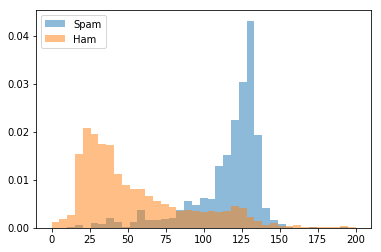

In [216]:
bins = np.linspace(0, 200, 40) # 40 numbers from 0 to 200
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label = 'Spam', normed=True)
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, label = 'Ham', normed=True)
pyplot.legend(loc = 'upper left')
pyplot.show()

Spam messages appear to be much longer than ham, so feature might be useful

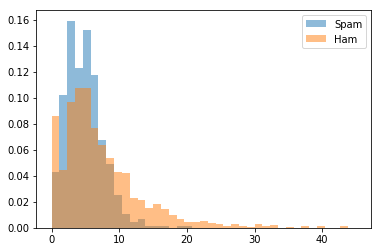

In [226]:
bins = np.linspace(0,45,40)
pyplot.hist(data[data['label']=='spam']['punc%'], bins, alpha=0.5, label='Spam', density=True)
pyplot.hist(data[data['label']== 'ham']['punc%'], bins, alpha=0.5, label='Ham', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

Not much of a difference in punctuations. But some separation between the distributions

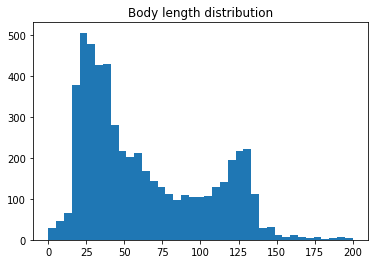

In [228]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body length distribution")
pyplot.show()

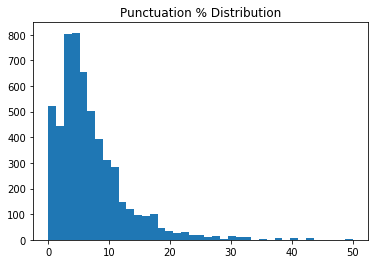

In [230]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punc%'], bins)
pyplot.title('Punctuation % Distribution')
pyplot.show()

Looks like a nice distribution candidate for transformation

### <font color=red> 4.3 Box-Cox power transformation </font>

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


Goal is to run a bunch of power transformations and use the one whose histogram is closest to a normal distribution <br>
**Process**:
1. Loop through a range of exponents to test 
2. Apply each transformation to each value of the chosen feature
3. Use some criteria to determine which of the transformations yield the best distributino

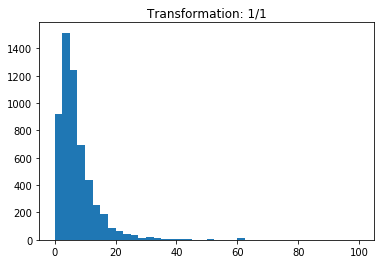

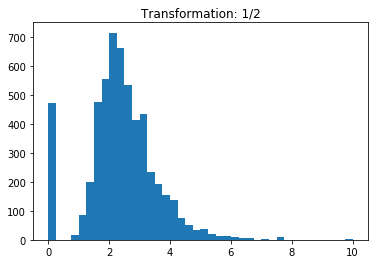

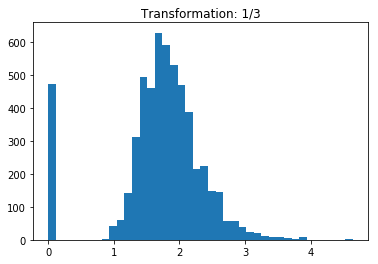

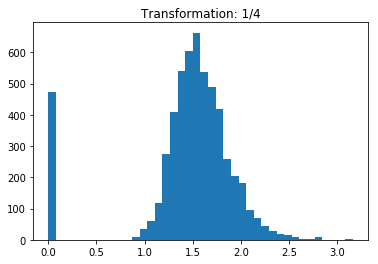

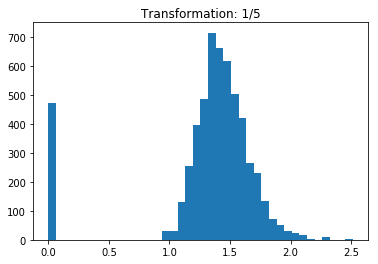

In [232]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punc%'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

## <font color=blue> 5. ML Classifiers </font>

## <font color = red> 5.1 Cross validation & evaluation metrics </font>

- If false positives costly, optimize model for precision
- If false negatives costly, optimize model for recall

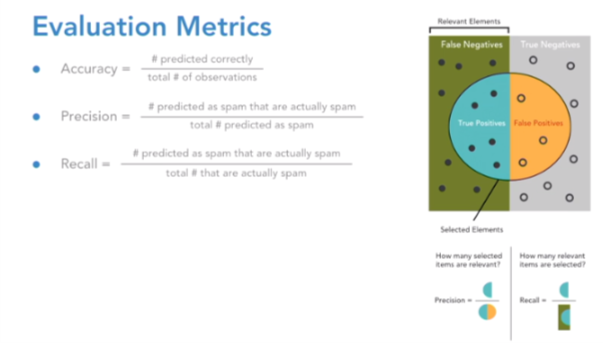

In [243]:
from IPython.display import Image
PATH = "C:/Users/sridevi.tolety/Documents/Study References/NLPwithPython"
Image('Precision_Recall.png', width=300)

## <font color = red> 5.2 Random forest </font>

- Ensemble method
- Aggregates the prediction of individual decision trees to arrive at final model
- Easily handles outliers, missing values
- Accepts various types of inputs (cntinuous, ordinal etc)
- Less likely to overfit
- Generates feature importance score

In [10]:
import nltk
import pandas as pd 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string 

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [16]:
data = pd.read_csv('SMSSpamCollection.tsv', sep="\t", header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [17]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return(round(count/(len(text)-text.count(" ")), 3)*100)

In [19]:
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [29]:
sample = ["I've agreed, I'll do it"]
print("".join([word.lower() for word in sample if word not in string.punctuation]))
newsample = "".join(word.lower() for word in sample if word not in string.punctuation)
re.split('\W+', newsample)

i've agreed, i'll do it


['i', 've', 'agreed', 'i', 'll', 'do', 'it']

In [30]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [31]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <font color = purple> 5.2.1 Build RF model </font>

In [33]:
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [40]:
rf = RandomForestClassifier(n_jobs = -1) #njobs to run process in parallel
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv = k_fold, scoring = 'accuracy', n_jobs = -1)

array([0.97127469, 0.97307002, 0.97486535, 0.95956873, 0.96765499])

##### Hold out test test

In [43]:
from sklearn.metrics import precision_recall_fscore_support as score 
from sklearn.model_selection import train_test_split

The train test split returns 4 datasets: train data, test data, train y, test y <br>
So we name and assign them accordingly 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [47]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [49]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.046195550541396256, 1804),
 (0.045336363662658224, 7353),
 (0.042538849966939976, 4799),
 (0.032702560909465134, 'body_len'),
 (0.024305286043126914, 2032),
 (0.02164871408133528, 7030),
 (0.01746674461724324, 3135),
 (0.01727755637167588, 6749),
 (0.01547738966844236, 2172),
 (0.014973421300485283, 3446),
 (0.013801936183721063, 5727),
 (0.013702250402054575, 6288),
 (0.012884234908831655, 690),
 (0.011960549924401723, 5456),
 (0.011384343097239963, 7221),
 (0.011199414640633107, 7593),
 (0.010470657934551488, 397),
 (0.010461886166474674, 439),
 (0.010261395227591126, 1361),
 (0.009678227988666991, 294),
 (0.009483755984220995, 5991),
 (0.009372917352647203, 7382),
 (0.00931592222506228, 7464),
 (0.009164277788932295, 295),
 (0.009015405428821453, 5081),
 (0.009003411696384502, 4298),
 (0.008888208290039733, 1882),
 (0.008745912327033775, 5920),
 (0.008721891025047153, 873),
 (0.00838662516758708, 354),
 (0.008206314757506826, 4272),
 (0.007721832540707937, 1359),
 (0.00734992958

Body length is clearly an important feature, which is not suprising 

In [52]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average = 'binary')

In [53]:
print('Precision:{}, Recall:{}, Accuracy:{}'.format(round(precision,3), 
                                                    round(recall,3), 
                                                    round((y_pred==y_test).sum()/len(y_pred),3)))

Precision:1.0, Recall:0.643, Accuracy:0.954


**Precision**: When the model identified an sms as spam, it was spam 100% of the time <br>
**Recall**: Of all actual spam, 64.3% was properly assigned as spam <br>
**Accuracy**: Of all emails, 95.4% were correctly identified

#### <font color = purple> 5.2.2 Grid search </font>

**Grid-search:** Exhaustively search all parameter combinations (here number of estimators and max_depth) in a given grid to determine the best model.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [62]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {}, Depth: {}, Precision: {}, Recall: {}, Accuracy:{}'.format(
        n_est,
        depth,
        round(precision,3),
        round(recall,3 ),
         round((y_pred==y_test).sum()/len(y_test),3)))

In [63]:
for n_est in [10,50,100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10, Depth: 10, Precision: 1.0, Recall: 0.245, Accuracy:0.9
Est: 10, Depth: 20, Precision: 0.987, Recall: 0.503, Accuracy:0.934
Est: 10, Depth: 30, Precision: 1.0, Recall: 0.605, Accuracy:0.948
Est: 10, Depth: None, Precision: 0.991, Recall: 0.789, Accuracy:0.971
Est: 50, Depth: 10, Precision: 1.0, Recall: 0.15, Accuracy:0.888
Est: 50, Depth: 20, Precision: 1.0, Recall: 0.565, Accuracy:0.943
Est: 50, Depth: 30, Precision: 1.0, Recall: 0.687, Accuracy:0.959
Est: 50, Depth: None, Precision: 1.0, Recall: 0.816, Accuracy:0.976
Est: 100, Depth: 10, Precision: 1.0, Recall: 0.184, Accuracy:0.892
Est: 100, Depth: 20, Precision: 1.0, Recall: 0.537, Accuracy:0.939
Est: 100, Depth: 30, Precision: 1.0, Recall: 0.701, Accuracy:0.961
Est: 100, Depth: None, Precision: 1.0, Recall: 0.796, Accuracy:0.973


#### <font color = purple> 5.2.3 Evaluate RF model with GridSearchCV </font>

Adding both TFIDF and countvectorizer as features to see which works better

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF -IDF 
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

#Count vectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()
X_tfidf_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,128,4.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,49,4.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,62,3.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,28,7.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,135,4.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,132,4.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,126,1.6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,89,6.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,111,7.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
rf = RandomForestClassifier()
# Dictionary of parameters and their ranges 
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,80.712684,0.867617,0.974677,0.999416,90,300,"{'max_depth': 90, 'n_estimators': 300}",1,0.978475,0.999551,...,0.974843,0.999102,0.969452,0.999776,0.973944,0.999327,4.603819,0.143785,0.003041,0.000229
7,41.319926,0.640655,0.974318,0.999326,90,150,"{'max_depth': 90, 'n_estimators': 150}",2,0.977578,0.999326,...,0.975741,0.999327,0.967655,0.999551,0.973046,0.999327,1.608776,0.208955,0.003719,0.000142
11,78.371160,0.871219,0.973420,1.000000,None,300,"{'max_depth': None, 'n_estimators': 300}",3,0.977578,1.000000,...,0.973046,1.000000,0.968553,1.000000,0.973046,1.000000,7.749569,0.296632,0.002945,0.000000
4,42.873608,0.558897,0.972701,0.993759,60,150,"{'max_depth': 60, 'n_estimators': 150}",4,0.976682,0.993488,...,0.973944,0.994613,0.966757,0.994837,0.971249,0.993266,5.925876,0.099109,0.003450,0.000845
10,45.156249,0.825186,0.972701,1.000000,None,150,"{'max_depth': None, 'n_estimators': 150}",4,0.976682,1.000000,...,0.973046,1.000000,0.967655,1.000000,0.968553,1.000000,2.401491,0.146145,0.004055,0.000000


In [69]:
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,52.789795,0.801164,0.973420,0.998743,90,150,"{'max_depth': 90, 'n_estimators': 150}",1,0.980269,0.997979,...,0.973944,0.998653,0.970350,0.999551,0.968553,0.998429,1.837522,0.377121,0.004016,0.000543
10,43.475356,0.629291,0.972881,1.000000,None,150,"{'max_depth': None, 'n_estimators': 150}",2,0.977578,1.000000,...,0.973944,1.000000,0.965858,1.000000,0.973046,1.000000,4.074307,0.143829,0.003840,0.000000
11,71.023216,0.773821,0.972701,1.000000,None,300,"{'max_depth': None, 'n_estimators': 300}",3,0.977578,1.000000,...,0.974843,1.000000,0.967655,1.000000,0.970350,1.000000,8.525307,0.149389,0.003450,0.000000
8,78.561883,0.784532,0.972342,0.998833,90,300,"{'max_depth': 90, 'n_estimators': 300}",4,0.977578,0.999102,...,0.974843,0.998653,0.967655,0.998878,0.969452,0.998878,1.490724,0.054585,0.003579,0.000168
5,83.853730,0.765914,0.971264,0.992906,60,300,"{'max_depth': 60, 'n_estimators': 300}",5,0.976682,0.993263,...,0.969452,0.993715,0.965858,0.993042,0.971249,0.992593,2.050170,0.087956,0.003609,0.000612


## <font color = red> 5.3 Gradient Boosting Model</font>

How is gradient boosting different from random forest? <br>
1. Used **boosting** instead of **bagging** i.e. gives more weight to incorrectly classified observations instead of randomly selecting
2. Training **iterative**, not in **parallel**
3. **Weighted voting** for final prediction, whereas rf is unweighted
4. Harder to tune
5. Slower to train
6. Easier to overfit

**Benefits** <br>
1. Extremely powerful
2. Accepts various types of inputs 
3. Classification or regression
4. Outputs feature importance

** Cons** <br>
1. Longer to train (can't parallelize)
2. More likely to overfit
3. DIfficult to tune

#### <font color = purple> 5.3.1 Build Gradient Boosting model </font>

In [70]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [71]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [73]:
data = pd.read_csv('SMSSpamCollection.tsv', sep = '\t', header=None)
data.columns = ['label', 'body_text']

In [74]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return(round(count/ (len(text)-text.count(" ")), 3))

In [81]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenized = re.split('\W+', text)
    text = [ps.stem(word) for word in tokenized if word not in stopwords]
    return(text)

In [75]:
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

In [76]:
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))

In [82]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [85]:
X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis =1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_initialized', '_check_params', '_clear_state', '_decision_function', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_init_decision_function', '_init_state', '_is_initialized', '_make_estimator', '_resize_state', '_staged_decision_function', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'n_features', 'predict', 'predict_log_proba', 'predict_proba', 'score', 's

#### Build our own grid search

In [88]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [100]:
def train_GB(n_est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Estimators:{} / MaxDepth:{} / LearningRate:{} ---- Precision:{} / Recall:{} / Accuracy{} '.format(
        n_est,
        max_depth,
        lr,
        round(precision, 3),
        round(recall,3),
        round((y_pred==y_test).sum()/len(y_test), 3)))

In [101]:
for n_est in [50,100, 150]:
    for max_depth in [3,7,11,15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Estimators:50 / MaxDepth:3 / LearningRate:0.01 ---- Precision:0.0 / Recall:0.0 / Accuracy0.857 
Estimators:50 / MaxDepth:3 / LearningRate:0.1 ---- Precision:0.944 / Recall:0.742 / Accuracy0.957 
Estimators:50 / MaxDepth:3 / LearningRate:1 ---- Precision:0.907 / Recall:0.855 / Accuracy0.967 
Estimators:50 / MaxDepth:7 / LearningRate:0.01 ---- Precision:0.0 / Recall:0.0 / Accuracy0.857 
Estimators:50 / MaxDepth:7 / LearningRate:0.1 ---- Precision:0.95 / Recall:0.843 / Accuracy0.971 
Estimators:50 / MaxDepth:7 / LearningRate:1 ---- Precision:0.922 / Recall:0.893 / Accuracy0.974 
Estimators:50 / MaxDepth:11 / LearningRate:0.01 ---- Precision:1.0 / Recall:0.006 / Accuracy0.858 
Estimators:50 / MaxDepth:11 / LearningRate:0.1 ---- Precision:0.958 / Recall:0.868 / Accuracy0.976 
Estimators:50 / MaxDepth:11 / LearningRate:1 ---- Precision:0.928 / Recall:0.893 / Accuracy0.975 
Estimators:50 / MaxDepth:15 / LearningRate:0.01 ---- Precision:1.0 / Recall:0.006 / Accuracy0.858 
Estimators:50 / MaxDe

#### <font color = purple> 5.2.2 Grid search </font>

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#### <font color = purple> 5.2.3 Evaluate GBM </font>

## <font color = red> 5.4 Model evaluation & selection </font>

- Vectorizers should be fit on the training set and only be used to transform the test set. VEctorizer will only recognize the words it saw in the training set
- Now we split the data into training and test set, train vectorizer on traiing set and use that to transform test set 
- Fit best rf and bgm model on train set and predict on test set

In [2]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#### Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

#### Vectorize text

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

#### Final evaluation of models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [ ]:

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))